In [6]:
from matplotlib import pyplot as plt
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [16]:
series = Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10)) # cumsum 累加

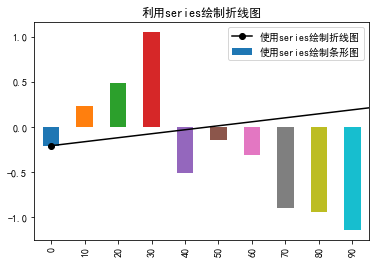

In [25]:
'''
用series绘图原理：
series的index作为x轴
series的value值作为y轴
'''
axes = series.plot(label='使用series绘制折线图',style='ko-') #获取绘制的对象
axes = series.plot('bar',label='使用series绘制条形图') #获取绘制的对象
axes.set_title('利用series绘制折线图')
# 显示图例
axes.legend()

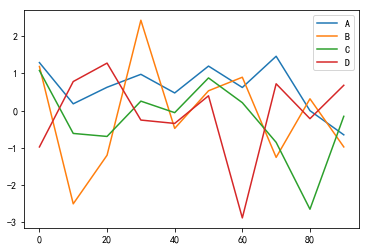

In [21]:
# 二，利用dataframe绘制
df = DataFrame(np.random.randn(10,4),
              index=np.arange(0,100,10),
              columns=list('ABCD'))
# dataFrame绘制图形,每一列绘制一个折线图，
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000156E736ACC0>,
      dtype=object)

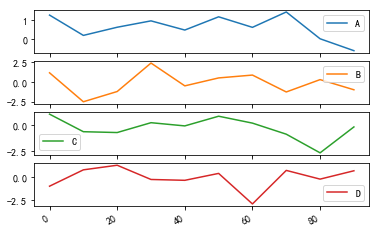

In [28]:
# 将dataframe中的各列分配到不同的子图中
df.plot(subplots=True)

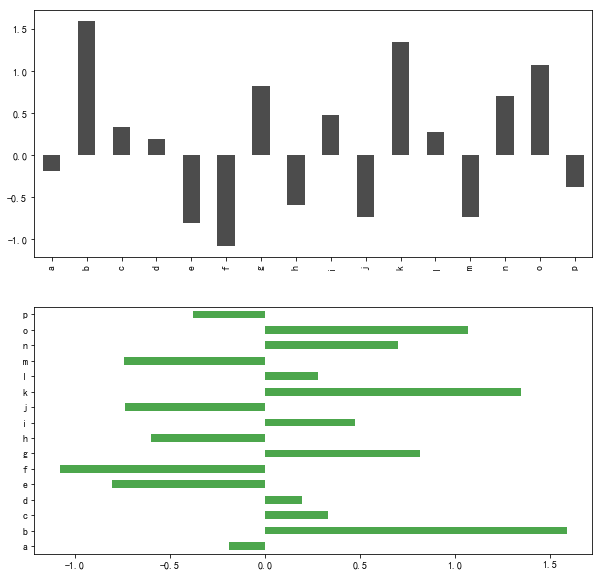

In [46]:
# 创建画板获取axes对象
fig,axes = plt.subplots(2,1,figsize=(10,10))
# fig.set_size_inches(40,20,forward=True)
# 创建绘图数据
data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))
# 利用series数据，在两行一列的画板中第一个绘制柱状图
data.plot(kind='bar', ax=axes[0], color='k',alpha=0.7)  #alpha 透明度
# 利用series数据，在两行一列的画板中第二个绘制柱状图
data.plot(kind='barh', ax=axes[1], color='g',alpha=0.7)

In [50]:
# pandas读取Excel文件
df = pd.read_excel('excel/pandas-matplotlib.xlsx','Sheet1')


,EMPID,Gender,Age,Sales,BMI,Income
0,E001,M,34,123,Normal,350
1,E002,F,40,114,Overweight,450
2,E003,F,37,135,Obesity,169
3,E004,M,30,139,Underweight,189
4,E005,F,44,117,Underweight,183
5,E006,M,36,121,Normal,80
6,E007,M,32,133,Obesity,166
7,E008,F,26,140,Normal,120
8,E009,M,32,133,Normal,75
9,E010,M,36,133,Underweight,40


Text(0,0.5,'人数')

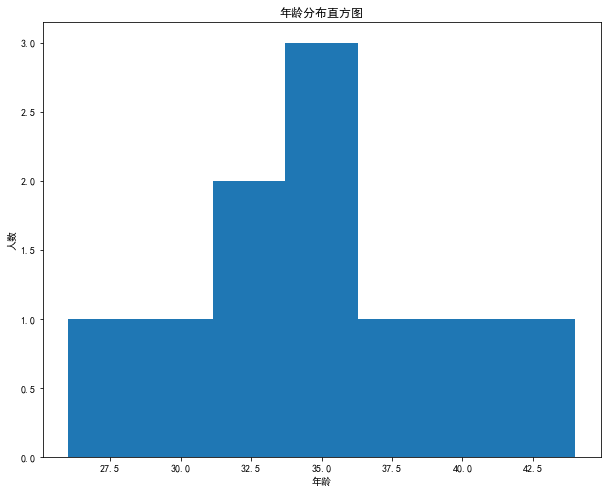

In [44]:
# 创建一个空白的画板
figure = plt.figure()
ax = figure.add_subplot(111)
figure.set_size_inches(10,8,forward=True)

# 在选中的绘图区域上绘制直方图
ax.hist(df['Age'],bins=7)
plt.title('年龄分布直方图')
plt.xlabel('年龄')
plt.ylabel('人数')

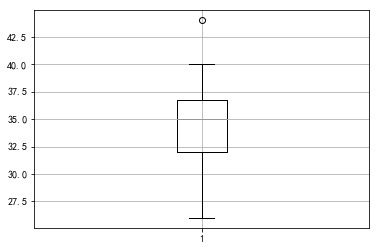

In [49]:
# 绘制箱线图
figure = plt.figure()
ax = figure.add_subplot(111)
ax.boxplot(df.Age)
ax.grid()

In [51]:
df

,EMPID,Gender,Age,Sales,BMI,Income
0,E001,M,34,123,Normal,350
1,E002,F,40,114,Overweight,450
2,E003,F,37,135,Obesity,169
3,E004,M,30,139,Underweight,189
4,E005,F,44,117,Underweight,183
5,E006,M,36,121,Normal,80
6,E007,M,32,133,Obesity,166
7,E008,F,26,140,Normal,120
8,E009,M,32,133,Normal,75
9,E010,M,36,133,Underweight,40


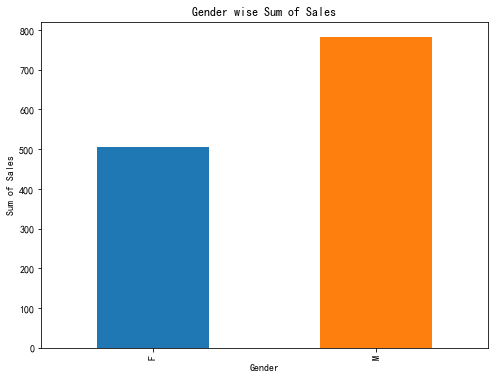

In [58]:
var = df.groupby('Gender') # 根据性别分组
aa = var.Sales.sum() # 分组后魅族的销量总和

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Sum of Sales')
ax1.set_title('Gender wise Sum of Sales')

aa.plot(kind='bar')

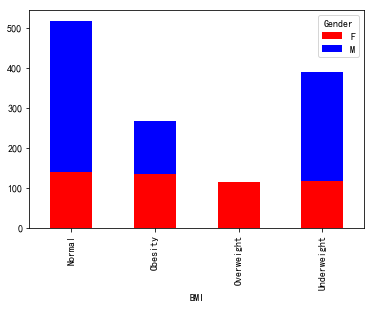

In [61]:
# 使用stacked 制作堆积图
var = df.groupby(['BMI', 'Gender']).Sales.sum()
var.unstack().plot(kind='bar', stacked=True, color=['red', 'blue']) # 把男女放到一起去
plt.show()

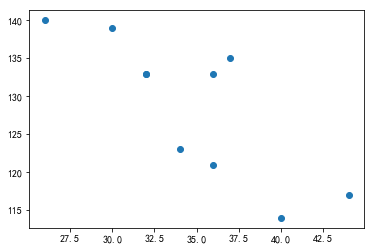

In [62]:
#利用pandas绘制散点图
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df['Age'], df['Sales'])
plt.show()


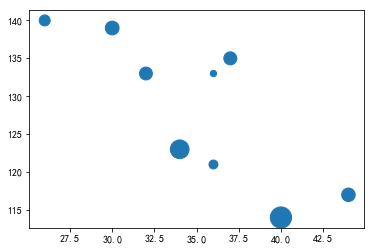

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df['Age'], df['Sales'], s=df['Income']) # 第三个变量表明根据收入气泡的大小
plt.show()

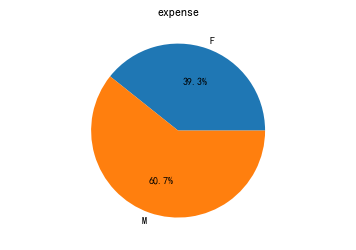

In [67]:
var = df.groupby(['Gender']).sum().stack() # 根据性别求另外的三列的综合

temp = var.unstack()
x_list = temp['Sales']
label_list = temp.index
plt.axis('equal')
plt.pie(x_list, labels=label_list, autopct='%1.1f%%')
plt.title('expense')
plt.show()